**NAME:SHRAVYA SHASHIDHAR      
GITHUB USERNAME:shravya2490             
USCID:sshashid**

In [5]:
import pandas as pd
from scipy.stats import bootstrap
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')  
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from IPython.display import display
from PIL import Image

In [2]:

test=list()
train=list()

def data_seperation(total_number, for_testing, activity):
    test_ending=for_testing+1
    testing_data=list()
    training_data=list()
    for i in range(1,test_ending):
        pathToChoose='../data/AReM/'+activity+'/dataset'+str(i)+'.csv'
        df=pd.read_csv(pathToChoose, usecols=range(7), skiprows = 4)
        if(activity=='bending1')or(activity=='bending2'):
            df['bend_class']=1
        else:
            df['bend_class']=0
        testing_data.append(df)
    final_test_data=pd.concat(testing_data,ignore_index=True)
    for k in range(test_ending,total_number+1):
        pathToChoose='../data/AReM/'+activity+'/dataset'+str(k)+'.csv'
        df=pd.read_csv(pathToChoose, usecols=range(7), skiprows = 4)
        if(activity=='bending1')or(activity=='bending2'):
            df['bend_class']=1
        else:
            df['bend_class']=0
        training_data.append(df)
    final_training_data=pd.concat(training_data,ignore_index=True)
    return final_test_data,final_training_data

bending1_data_seperation=data_seperation(7,2,'bending1')
bending2_data_seperation=data_seperation(6,2,'bending2')
cycling_data_seperation=data_seperation(15,3,'cycling')
lying_data_seperation=data_seperation(15,3,'lying')
sitting_data_seperation=data_seperation(15,3,'sitting')
standing_data_seperation=data_seperation(15,3,'standing')
walking_data_seperation=data_seperation(15,3,'walking')

test.append(bending1_data_seperation[0])
test.append(bending2_data_seperation[0])
test.append(cycling_data_seperation[0])
test.append(lying_data_seperation[0])
test.append(sitting_data_seperation[0])
test.append(standing_data_seperation[0])
test.append(walking_data_seperation[0])

train.append(bending1_data_seperation[1])
train.append(bending2_data_seperation[1])
train.append(cycling_data_seperation[1])
train.append(lying_data_seperation[1])
train.append(sitting_data_seperation[1])
train.append(standing_data_seperation[1])
train.append(walking_data_seperation[1])

testData=pd.concat(test,ignore_index=True)
trainData=pd.concat(train,ignore_index=True)


In [4]:
time_series=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
time_features=['min','max','mean','median','std dev','1st quart','3rd quart']
all_features=list()

def extract_feature(num,testnum,activity):
    Actual_features=['min','max','mean','50%','std','25%','75%']
    features=list()
    global num_of_instance
    train_path=list()
    test_path=list()

    for i in range(1,testnum+1):
        pathToChoose='../data/AReM/'+activity+'/dataset'+str(i)+'.csv'
        test_path.append(pathToChoose)
    for i in range(testnum+1,num+1):
        pathToChoose='../data/AReM/'+activity+'/dataset'+str(i)+'.csv'
        train_path.append(pathToChoose)

    for path in train_path:
        df=pd.read_csv(path, usecols=range(7), skiprows = 4)
        local_stats=[num_of_instance]
        for col_name in time_series:
            for f in Actual_features:
               local_stats.append(df.describe()[col_name][f])
        if(activity=='bending1') or(activity=='bending2'):
            local_stats.append(1)
        else:
            local_stats.append(0)
        local_stats.append(0)
        features.append(local_stats)
        num_of_instance=num_of_instance+1

    for path in test_path:
        df=pd.read_csv(path, usecols=range(7), skiprows = 4)
        local_stats=[num_of_instance]
        for col_name in time_series:
            for f in Actual_features:
               local_stats.append(df.describe()[col_name][f])
        if(activity=='bending1') or(activity=='bending2'):
            local_stats.append(1)
        else:
            local_stats.append(0)
        local_stats.append(1)
        features.append(local_stats)
        num_of_instance=num_of_instance+1

    return features

num_of_instance=1
f1=extract_feature(7,2,'bending1')
f2=extract_feature(6,2,'bending2')
f3=extract_feature(15,3,'cycling')
f4=extract_feature(15,3,'lying')
f5=extract_feature(15,3,'sitting')
f6=extract_feature(15,3,'standing')
f7=extract_feature(15,3,'walking')

all_features.extend(f1)
all_features.extend(f2)
all_features.extend(f3)
all_features.extend(f4)
all_features.extend(f5)
all_features.extend(f6)
all_features.extend(f7)


columns_disp=list()
columns_disp.append('Instance')
num_of_timeseries=[1,2,3,4,5,6]
for num in num_of_timeseries:
    for t in time_features:
        columns_disp.append(t+str(num))

columns_disp.append('bend_class')
columns_disp.append('test_class')
final_table=pd.DataFrame(all_features, columns=columns_disp)
display(final_table)
        
        

    

    
    

    


Instance   min1   max1      mean1  median1  std dev1  1st quart1  \
0          1  35.00  47.40  43.954500   44.330  1.558835       43.00   
1          2  33.00  47.75  42.179812   43.500  3.670666       39.15   
2          3  33.00  45.75  41.678063   41.750  2.243490       41.33   
3          4  37.00  48.00  43.454958   43.250  1.386098       42.50   
4          5  36.25  48.00  43.969125   44.500  1.618364       43.31   
..       ...    ...    ...        ...      ...       ...         ...   
83        84  23.50  46.25  34.873229   35.250  4.531720       31.75   
84        85  19.25  44.00  34.473188   35.000  4.796705       31.25   
85        86  19.33  43.50  34.227771   35.500  4.889576       30.50   
86        87  12.50  45.00  33.509729   34.125  4.850923       30.50   
87        88  15.00  46.75  34.660583   35.000  5.315110       31.00   

    3rd quart1  min2   max2  ...  3rd quart5  min6  max6     mean6  median6  \
0        45.00   0.0   1.70  ...       36.50  0.00  1.79  0.493292    0.430   
1        45.00   0.0   3.00  ...       36.33  0.00  2.18  0.613521    0.500   
2        42.75   0.0   2.83  ...       31.25  0.00  1.79  0.383292    0.430   
3        45.00   0.0   1.58  ...       24.00  0.00  5.26  0.679646    0.500   
4        44.67   0.0   1.50  ...       23.75  0.00  2.96  0.555312    0.490   
..         ...   ...    ...  ...         ...   ...   ...       ...      ...   
83       38.25   0.0  14.82  ...       18.00  0.00  9.51  3.424646    3.270   
84       38.00   0.0  13.86  ...       17.75  0.43  9.00  3.340458    3.090   
85       37.75   0.0  14.50  ...       18.67  0.00  9.74  3.394125    3.100   
86       36.75   0.0  13.05  ...       18.75  0.00  8.96  3.378479    3.085   
87       38.25   0.0  13.44  ...       18.50  0.00  8.99  3.244396    3.000   

    std dev6  1st quart6  3rd quart6  bend_class  test_class  
0   0.513506       0.000       0.940           1           0  
1   0.524317       0.000       1.000           1           0  
2   0.389164       0.000       0.500           1           0  
3   0.622534       0.430       0.870           1           0  
4   0.487826       0.000       0.830           1           0  
..       ...         ...         ...         ...         ...  
83  1.690960       2.170       4.500           0           0  
84  1.699114       2.120       4.375           0           0  
85  1.792090       2.105       4.425           0           1  
86  1.787360       2.060       4.440           0           1  
87  1.630983       2.120       4.240           0           1  

[88 rows x 45 columns]

**It can be mean, median and standard deviation- which has a low range in the CI.**

**2. Time Series Classification Part 2: Binary and Multiclass Classification**

(i)Assume that you want to use the training set to classify bending from other
activities, i.e. you have a binary classification problem. Depict scatter plots
of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of
each instance, and use color to distinguish bending vs. other activities. (See
p. 129 of the textbook).

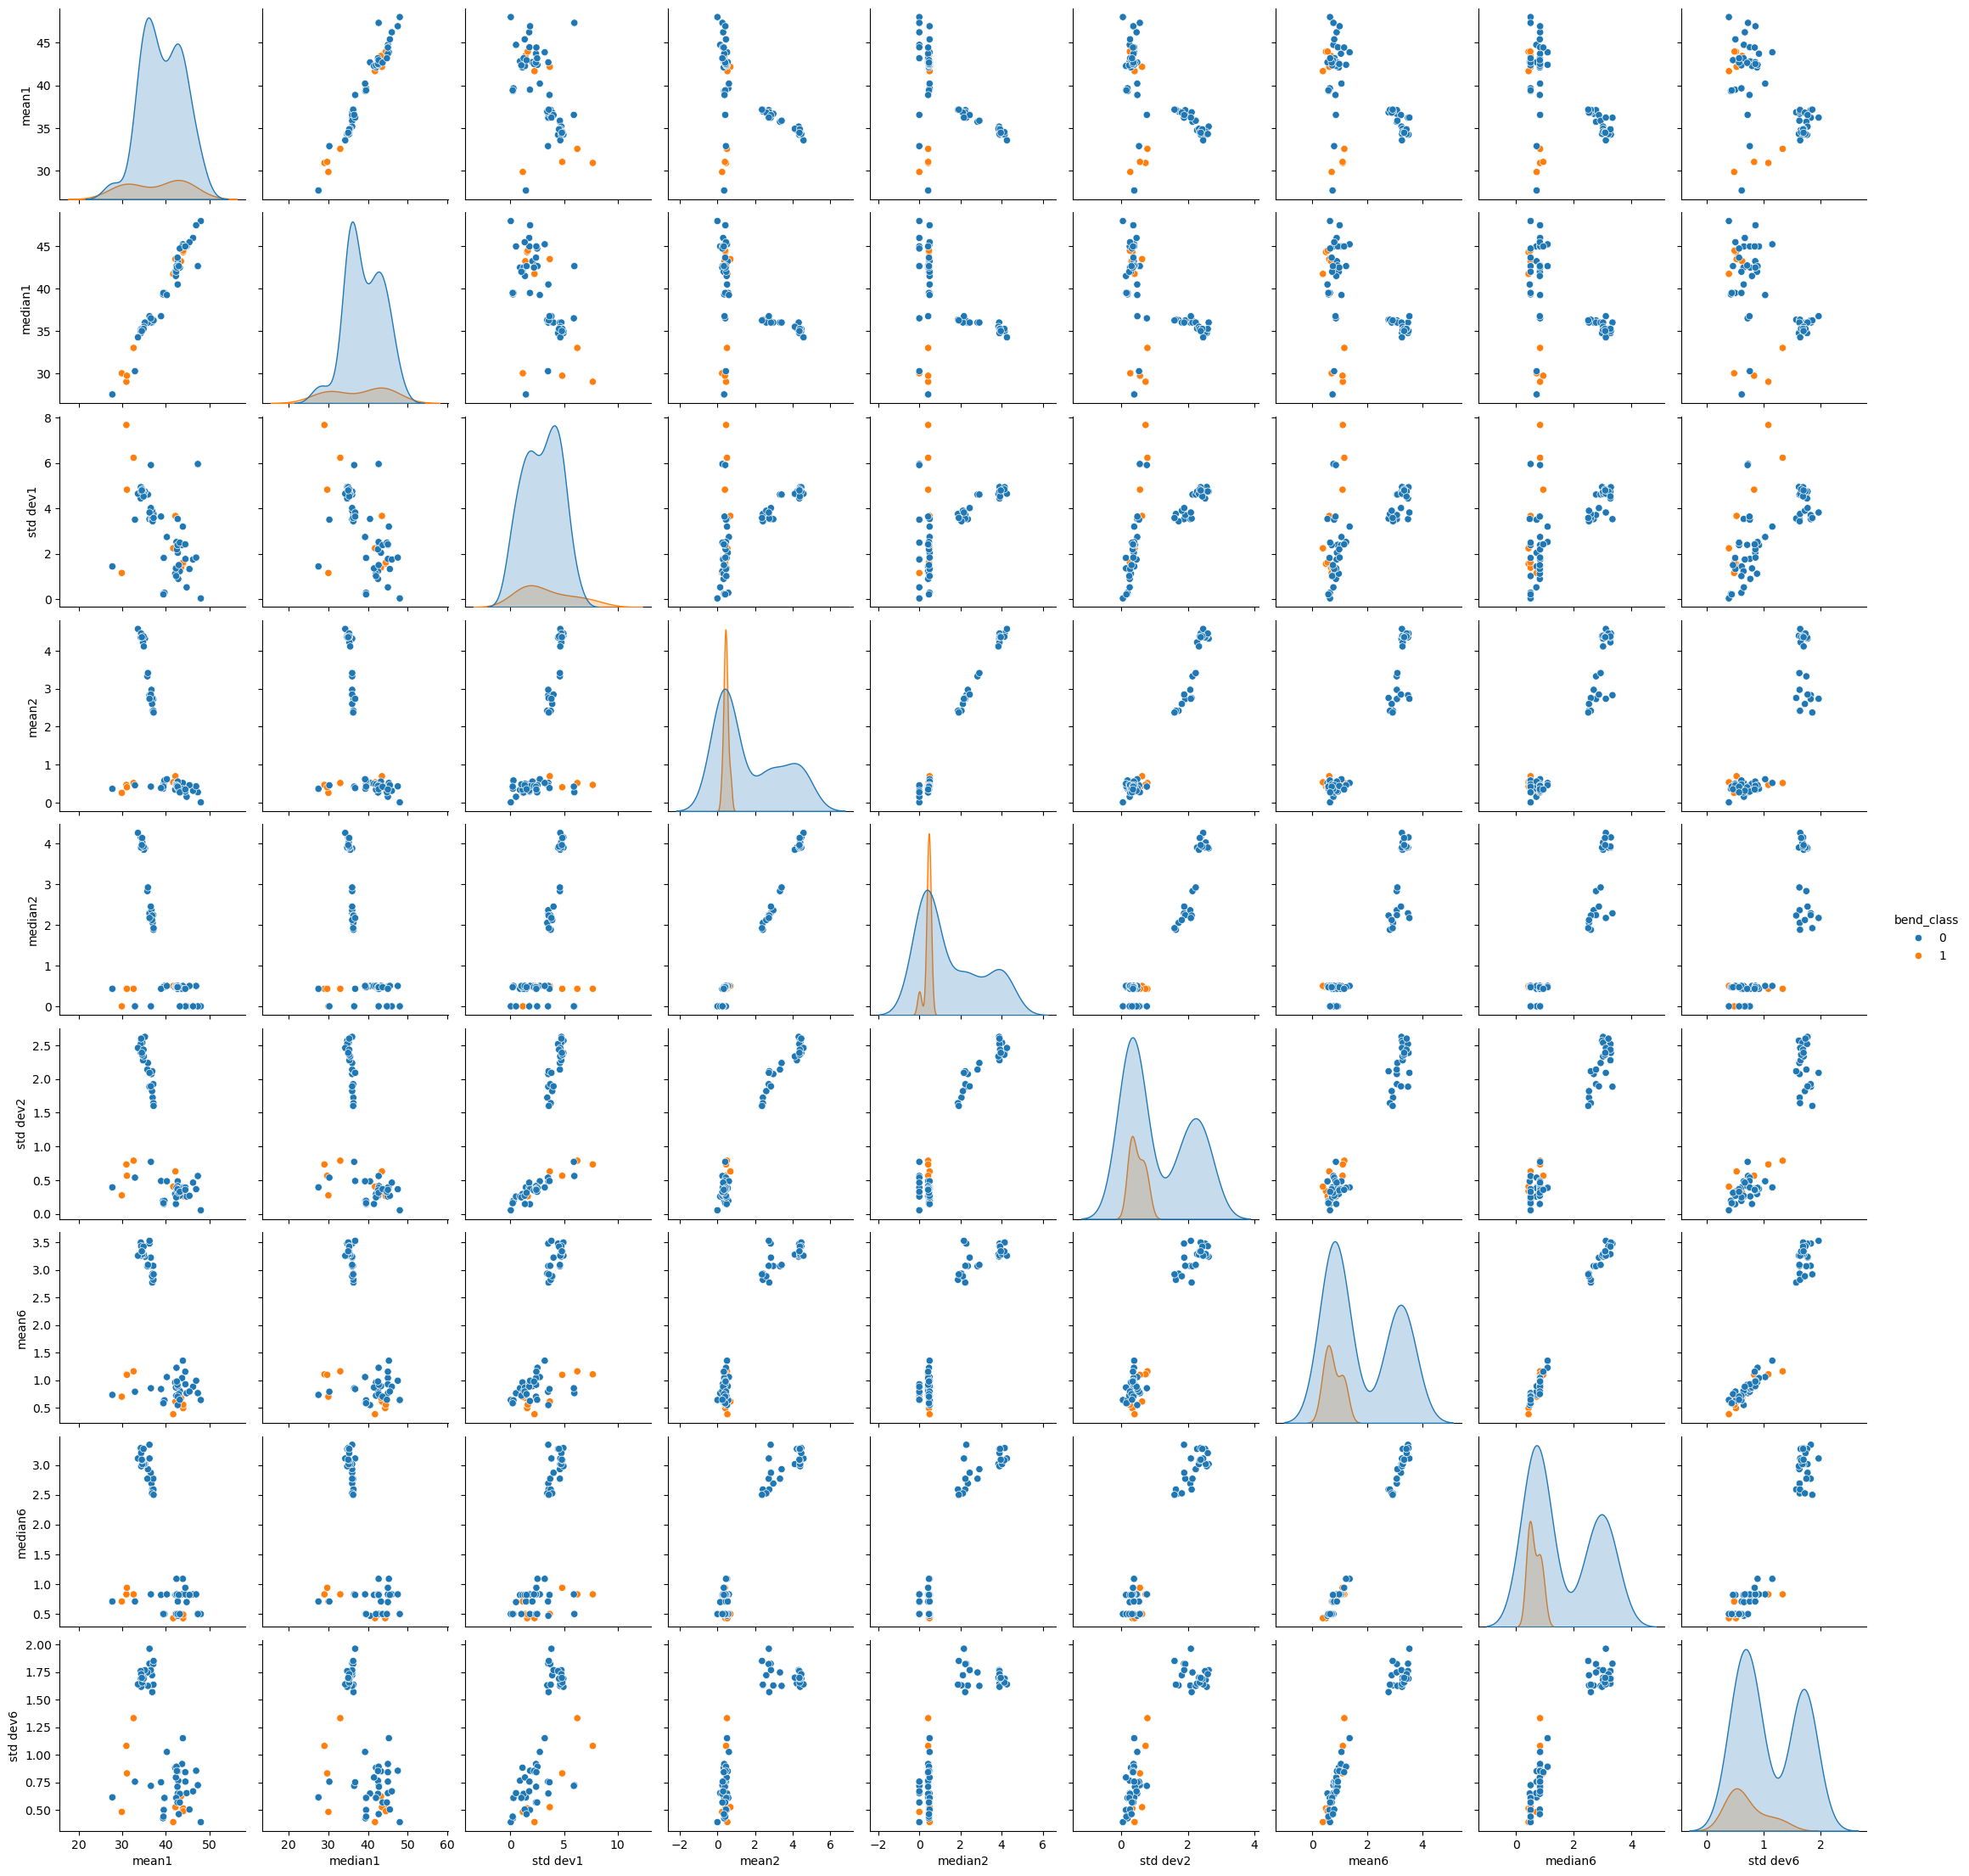

In [5]:
feature_to_plot=['mean','median', 'std dev']
ts=[1,2,6]
col_display=['mean1','median1','std dev1','mean2','median2','std dev2','mean6','median6','std dev6','bend_class']
train_data_classify_bending= final_table.loc[final_table['test_class']==0]
df_plot=train_data_classify_bending[col_display]
sns.pairplot(df_plot, hue='bend_class') 


(ii)Break each time series in your training set into two (approximately) equal
length time series. Now instead of 6 time series for each of the training
instances, you have 12 time series for each training instance. Repeat the
experiment in 2(a)i, i.e depict scatter plots of the features extracted from both
parts of the time series 1,2, and 6. Do you see any considerable dierence in
the results with those of 2(a)i?

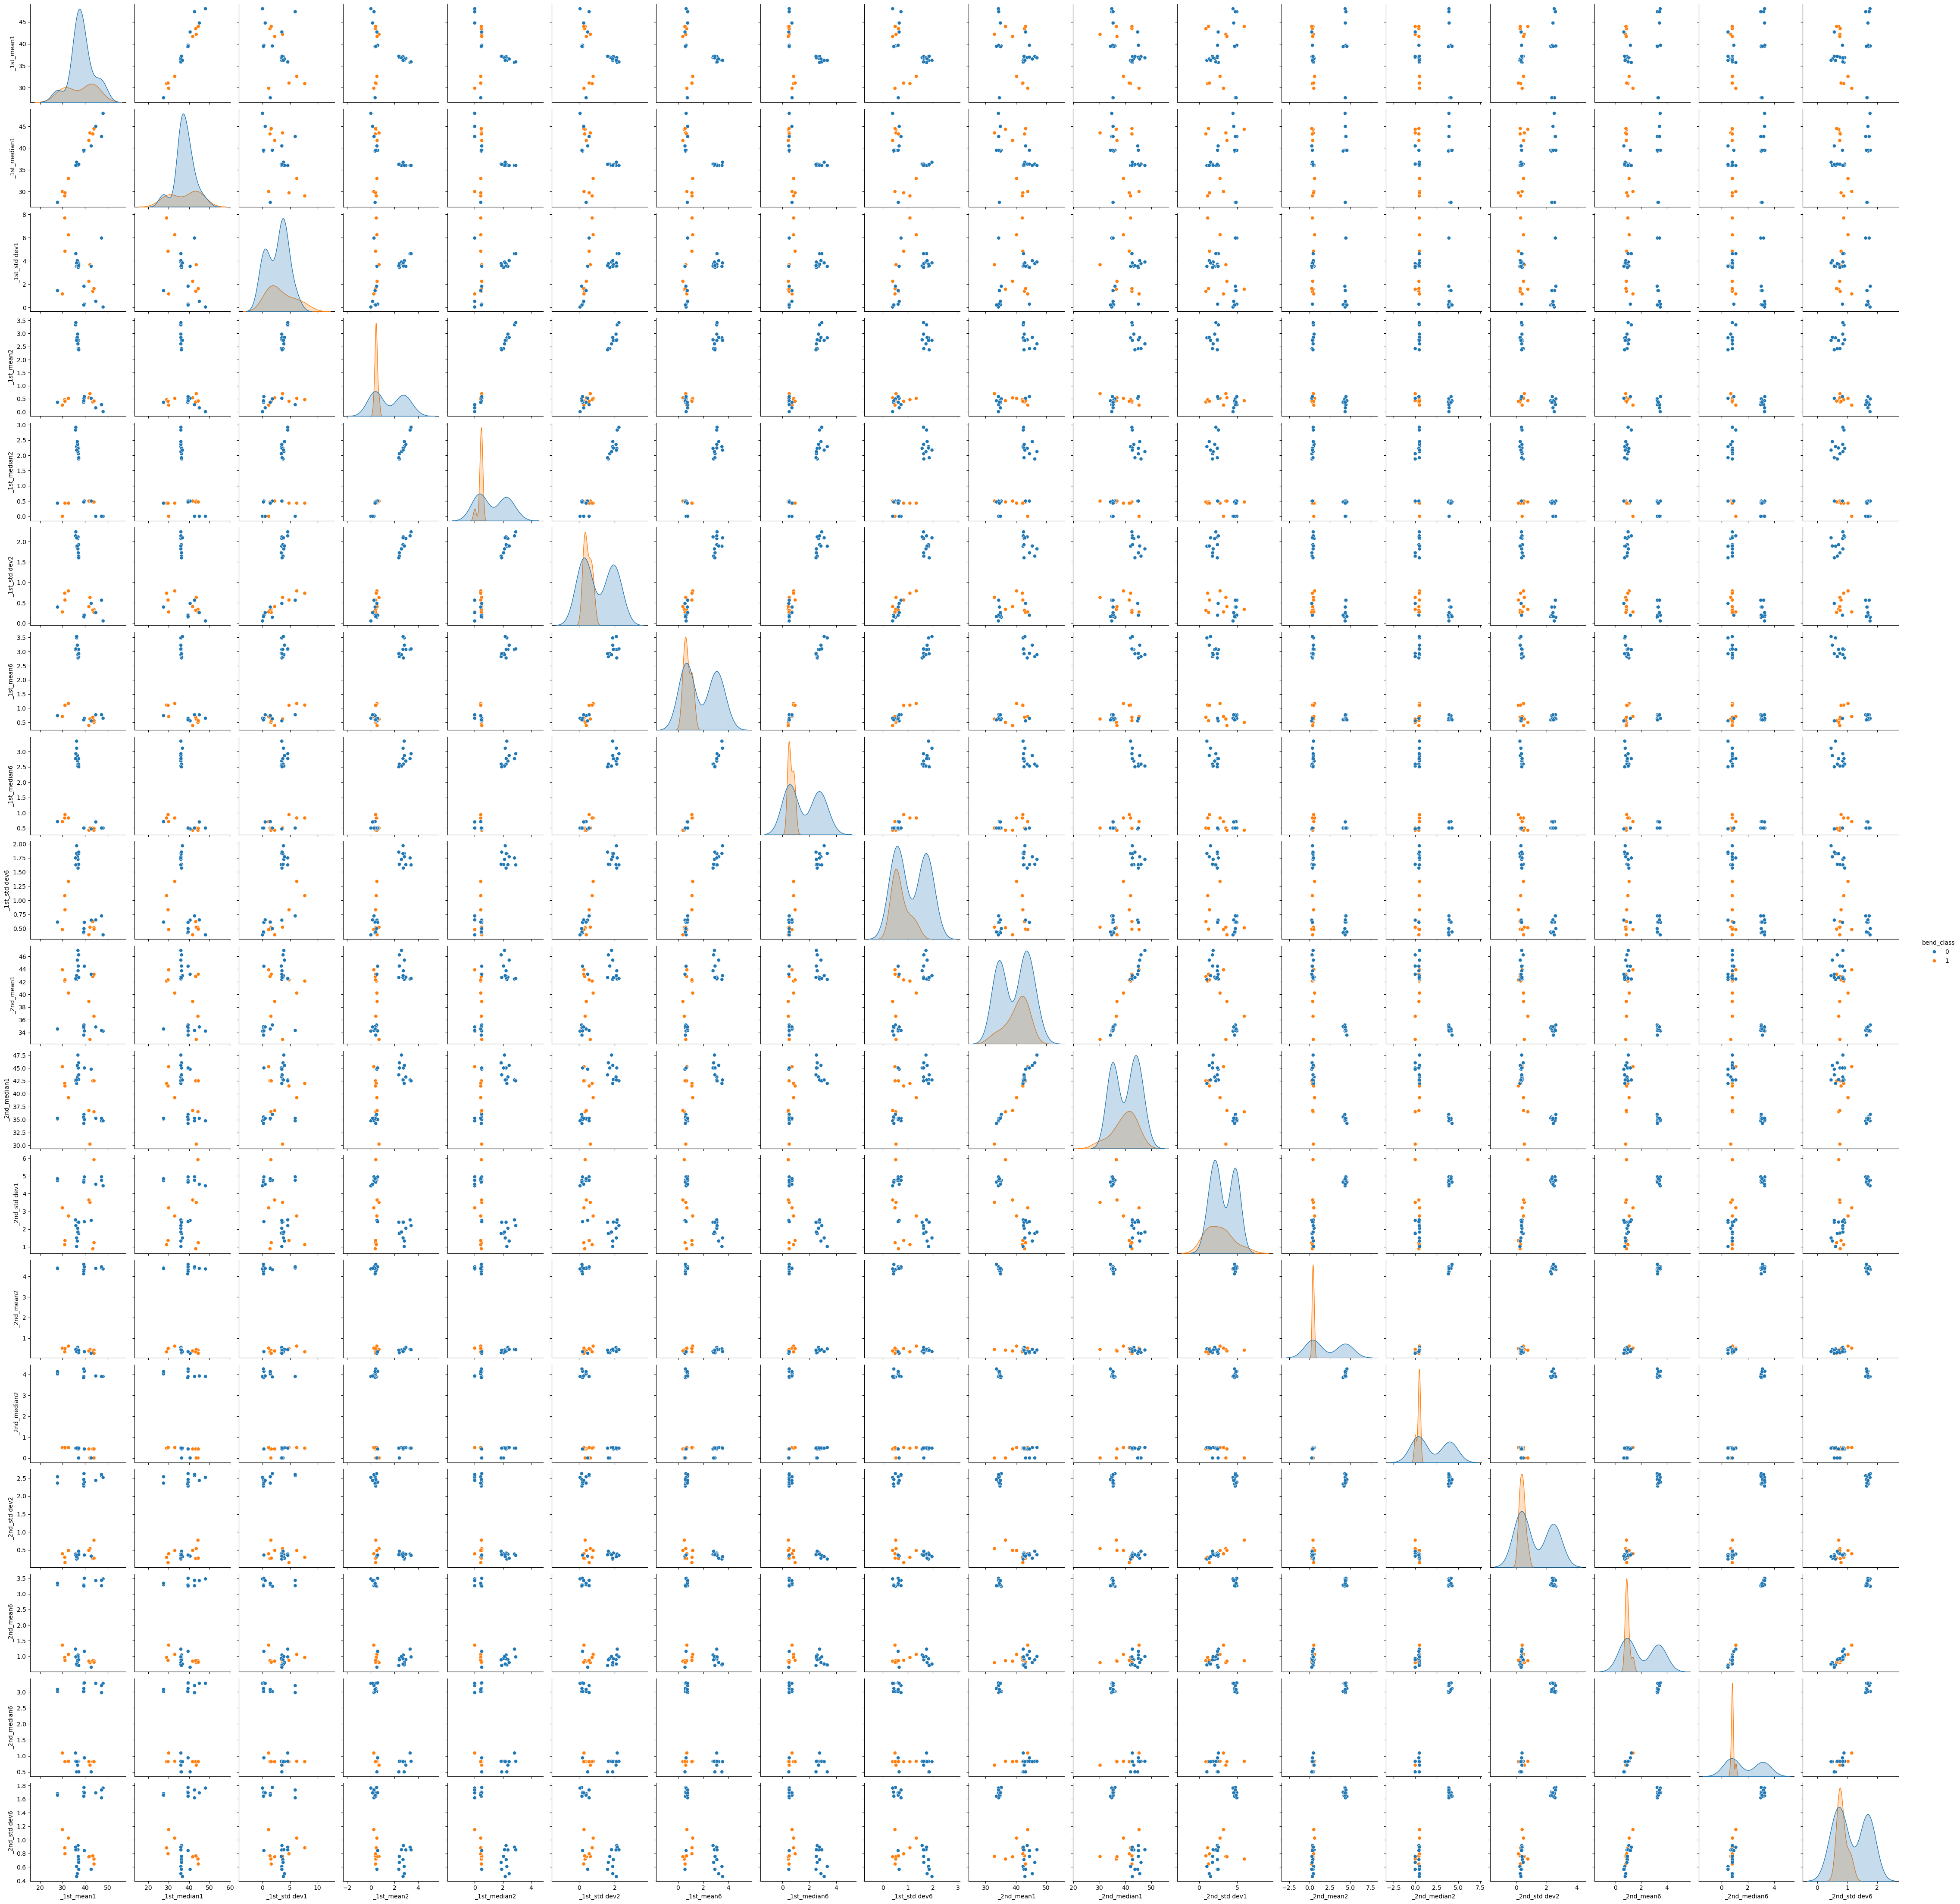

In [8]:
training_data=final_table.loc[final_table['test_class']==0]
num=math.floor(len(training_data)/2)
training_data_1=df_plot[0:num]
training_data_2=df_plot[num:-1]
training_data_1=training_data_1.reset_index()
training_data_2=training_data_2.reset_index()
training_data_1=training_data_1.iloc[:,1:]
training_data_2=training_data_2.iloc[:,1:-1]

col_disp_new_1={}
col_disp_new_2={}
for i in ts:
    for f in feature_to_plot:
        col_disp_new_1[f+str(i)]='_1st_'+f+str(i)
col_disp_new_1['bend_class']='bend_class'
training_data_1=training_data_1.rename(columns=col_disp_new_1)
for i in ts:
    for f in feature_to_plot:
        col_disp_new_2[f+str(i)]='_2nd_'+f+str(i)
training_data_2=training_data_2.rename(columns=col_disp_new_2)
training_data_together=pd.concat([training_data_1,training_data_2],axis=1)
sns.pairplot(training_data_together,hue='bend_class')





**Yes, bending seems more distinguishable than the other activities.**

(iii)

In [5]:
num_of_timeseries=[1,2,3,4,5,6]
time_series=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
imp_features=['mean','median','std dev']

def new_extract_feature(num,testnum,activity,size):
    act_features=['mean','50%','std']
    new_features=list()
    train_path=list()
    test_path=list()

    for i in range(1,testnum+1):
        pathToChoose='../data/AReM/'+activity+'/dataset'+str(i)+'.csv'
        test_path.append(pathToChoose)
    for i in range(testnum+1,num+1):
        pathToChoose='../data/AReM/'+activity+'/dataset'+str(i)+'.csv'
        train_path.append(pathToChoose)

    for path in train_path:
        data_info=[]
        df=pd.read_csv(path, usecols=range(7),skiprows = 4)
        df_parts=np.array_split(df,size)
        for data in df_parts:
            data_stats=[]
            for n in time_series:
                for f in act_features:
                    data_stats.append(data.describe()[n][f])
            data_info.extend(data_stats)
        if(activity=='bending1')or(activity=='bending2'):
            data_info.append(1)
        else:
            data_info.append(0)
        data_info.append(0)
        df_processed=pd.DataFrame(data_info).transpose()
        new_features.append(df_processed)

    for path in test_path:
        data_info=[]
        df=pd.read_csv(path, usecols=range(7),skiprows = 4)
        df_parts=np.array_split(df,size)
        for data in df_parts:
            data_stats=[]
            for n in time_series:
                for f in act_features:
                    data_stats.append(data.describe()[n][f])
            data_info.extend(data_stats)
        if(activity=='bending1')or(activity=='bending2'):
            data_info.append(1)
        else:
            data_info.append(0)
        data_info.append(1)
        df_processed=pd.DataFrame(data_info).transpose()
        new_features.append(df_processed)

    return new_features

    
        
        
        
        
        
    




    
        
    


In [12]:
lmax=20
ts_train=[size for size in range(1,lmax+1)]
for i in ts_train:
    three_features=list()
    f1=new_extract_feature(7,2,'bending1',i)
    f2=new_extract_feature(6,2,'bending2',i)
    f3=new_extract_feature(15,3,'cycling',i)
    f4=new_extract_feature(15,3,'lying',i)
    f5=new_extract_feature(15,3,'sitting',i)
    f6=new_extract_feature(15,3,'standing',i)
    f7=new_extract_feature(15,3,'walking',i)
    three_features.extend(f1)
    three_features.extend(f2)
    three_features.extend(f3)
    three_features.extend(f4)
    three_features.extend(f5)
    three_features.extend(f6)
    three_features.extend(f7)

    df_new=pd.concat(three_features,ignore_index=True)
    new_cols=[]
    for j in range(1,i+1):
        for num in num_of_timeseries:
            for f in imp_features:
              new_cols.append(f+str(num)+str(j))
    new_cols.extend(['bend_class','test_class'])
    df_new.columns=new_cols
    df_Log_Reg_Train=df_new.loc[df_new['test_class']==0]
    print(df_Log_Reg_Train.shape)
    X_train = df_Log_Reg_Train.iloc[:, :-2]
    Y_train = df_Log_Reg_Train.iloc[:,-2:-1]
    
    lr_model = LogisticRegression(max_iter=1000)
    strat_CV=StratifiedKFold(n_splits = 5, shuffle=True, random_state=69)
    rev=RFECV(estimator = lr_model, step=1, cv=strat_CV, scoring = 'accuracy')
    rev.fit(X_train, Y_train) 
    print("l=", i, "p=", "%d" % rev.n_features_)
    print("mean accuracy score:", np.max(rev.cv_results_['mean_test_score']))


    
    


(69, 20)
l= 1 p= 3
mean accuracy score: 0.9571428571428571
(69, 38)
l= 2 p= 2
mean accuracy score: 0.9285714285714285
(69, 56)
l= 3 p= 2
mean accuracy score: 0.9571428571428571
(69, 74)
l= 4 p= 3
mean accuracy score: 0.9560439560439562
(69, 92)
l= 5 p= 3
mean accuracy score: 0.9571428571428571
(69, 110)
l= 6 p= 7
mean accuracy score: 0.9714285714285715
(69, 128)
l= 7 p= 4
mean accuracy score: 0.9417582417582417
(69, 146)
l= 8 p= 14
mean accuracy score: 0.9428571428571428
(69, 164)
l= 9 p= 4
mean accuracy score: 0.9274725274725275
(69, 182)
l= 10 p= 1
mean accuracy score: 0.9714285714285715
(69, 200)
l= 11 p= 7
mean accuracy score: 0.9714285714285715
(69, 218)
l= 12 p= 3
mean accuracy score: 0.9571428571428571
(69, 236)
l= 13 p= 2
mean accuracy score: 0.9571428571428571
(69, 254)
l= 14 p= 9
mean accuracy score: 0.9571428571428571
(69, 272)
l= 15 p= 6
mean accuracy score: 0.9571428571428571
(69, 290)
l= 16 p= 5
mean accuracy score: 0.9571428571428571
(69, 308)
l= 17 p= 3
mean accuracy sc

**The best value of (l,p) is (11,7)**

In [8]:
def train_with_l(l_choosen):
    p_features=[]
    num_of_timeseries=[1,2,3,4,5,6]
    imp_features=['mean','median','std dev']
    f1=new_extract_feature(7,2,'bending1',l_choosen)
    f2=new_extract_feature(6,2,'bending2',l_choosen)
    f3=new_extract_feature(15,3,'cycling',l_choosen)
    f4=new_extract_feature(15,3,'lying',l_choosen)
    f5=new_extract_feature(15,3,'sitting',l_choosen)
    f6=new_extract_feature(15,3,'standing',l_choosen)
    f7=new_extract_feature(15,3,'walking',l_choosen)
    p_features.extend(f1)
    p_features.extend(f2)
    p_features.extend(f3)
    p_features.extend(f4)
    p_features.extend(f5)
    p_features.extend(f6)
    p_features.extend(f7)
    
    df_p_feature=pd.concat(p_features,ignore_index=True)
    c_name=[]
    for k in range(1,l_choosen+1):
        for num in num_of_timeseries:
            for f in imp_features:
                c_name.append(f+str(num)+str(k))
    c_name.extend(["bend_class", "test_class"])
    df_p_feature.columns=c_name
    df_p_feature = df_p_feature.apply(pd.to_numeric)
    df_p_feature['bend_class']=df_p_feature['bend_class'].astype('int')
    
    
    return df_p_feature

    
    

**The selection of the feature is done within the cross validation step**

(iv)

In [31]:
df_p_feature=train_with_l(11)
df_p_feature_train = df_p_feature.loc[df_p_feature['test_class'] == 0]
X_train = df_p_feature_train.iloc[:, :-2]
Y_train = df_p_feature_train.iloc[:,-2:-1]
df_p_feature_test = df_p_feature.loc[df_p_feature['test_class'] == 1]
X_test = df_p_feature_train.iloc[:, :-2]
Y_test = df_p_feature_train.iloc[:,-2:-1]

lr_model = LogisticRegression(max_iter=1000)
strat_CV=StratifiedKFold(n_splits = 5, shuffle=True, random_state=69)
rev=RFECV(estimator = lr_model, step=1, cv=strat_CV, scoring = 'accuracy')
rev.fit(X_train, Y_train)
y_pred = rev.predict(X_train)
print("CONFUSION MATRIX")
confusion_matrix(Y_train, y_pred)

CONFUSION MATRIX


array([[60,  0],
       [ 0,  9]], dtype=int64)

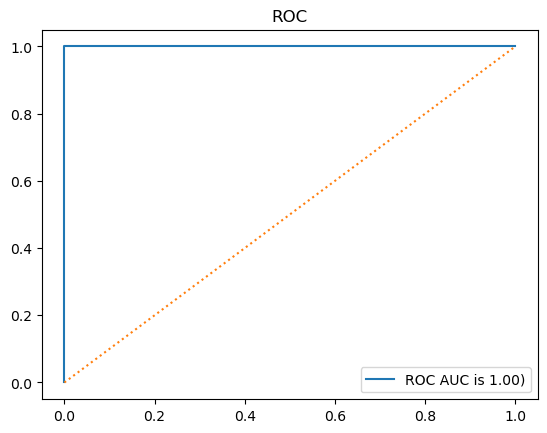

In [32]:

rfe_score = roc_auc_score(Y_train, y_pred)
FPR, TPR, th= roc_curve(Y_train, rev.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ROC AUC is %0.2f' % rfe_score)
plt.plot([0, 1], [0, 1],linestyle='dotted')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [33]:
cols = list(X_train.columns[rev.support_])
X_train_selected = X_train[cols]
lm= sm.Logit(Y_train, X_train_selected)
model_selected = lm.fit(method = 'bfgs')
print(model_selected.summary())

Optimization terminated successfully.
         Current function value: 0.000002
         Iterations: 20
         Function evaluations: 23
         Gradient evaluations: 23
                           Logit Regression Results                           
Dep. Variable:             bend_class   No. Observations:                   69
Model:                          Logit   Df Residuals:                       62
Method:                           MLE   Df Model:                            6
Date:                Wed, 05 Mar 2025   Pseudo R-squ.:                   1.000
Time:                        17:54:20   Log-Likelihood:            -0.00013559
converged:                       True   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 9.589e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
mean52         1.2275    819.142      

(v)

In [35]:

lr_model = LogisticRegression(max_iter=1000)
strat_CV=StratifiedKFold(n_splits = 5, shuffle=True, random_state=69)
rev=RFECV(estimator = lr_model, step=1, cv=strat_CV, scoring = 'accuracy')
rev.fit(X_test, Y_test.values.ravel())
y_pred_test = rev.predict(X_test)
print("Cross-validation score for test set is :", rev.score(X_test, Y_test))

Cross-validation score for test set is : 1.0


**The cross validation score for the test set is 1.0 and for the training the CV score was 0.9714**

(vi) **Yes the classes are well seperated in which case Logistic Regression parameters are not accurate**

(vii) **While there are good amount of true positives, the true negatives are very less.**

In [37]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_smote, Y_smote = smote.fit_resample(X_train, Y_train)

lr_model = LogisticRegression(max_iter=1000)
strat_CV=StratifiedKFold(n_splits = 5, shuffle=True, random_state=69)
rev=RFECV(estimator = lr_model, step=1, cv=strat_CV, scoring = 'accuracy')
rev.fit(X_smote, Y_smote)
y_pred = rev.predict(X_smote)
print("CONFUSION MATRIX")
confusion_matrix(Y_smote, y_pred)

CONFUSION MATRIX


array([[60,  0],
       [ 0, 60]], dtype=int64)

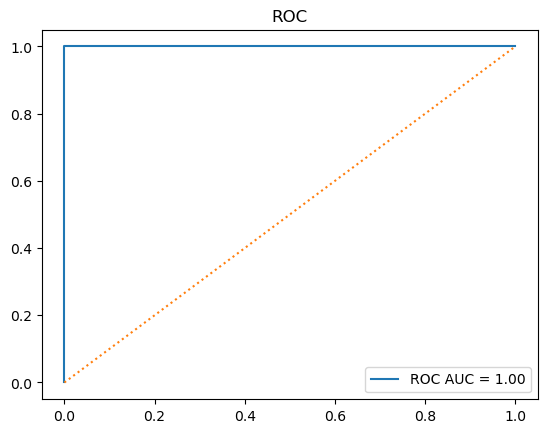

In [42]:
rfe_score = roc_auc_score(Y_smote, y_pred)
fpr, tpr, thresholds= roc_curve(Y_smote, rev.predict_proba(X_smote)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ROC AUC = %0.2f' % rfe_score)
plt.plot([0, 1], [0, 1],linestyle='dotted')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

(b)(i)

In [6]:
lmax=20
ts_train=[size for size in range(1,lmax+1)]
for i in ts_train:
    three_features=list()
    f1=new_extract_feature(7,2,'bending1',i)
    f2=new_extract_feature(6,2,'bending2',i)
    f3=new_extract_feature(15,3,'cycling',i)
    f4=new_extract_feature(15,3,'lying',i)
    f5=new_extract_feature(15,3,'sitting',i)
    f6=new_extract_feature(15,3,'standing',i)
    f7=new_extract_feature(15,3,'walking',i)
    three_features.extend(f1)
    three_features.extend(f2)
    three_features.extend(f3)
    three_features.extend(f4)
    three_features.extend(f5)
    three_features.extend(f6)
    three_features.extend(f7)

    df_new=pd.concat(three_features,ignore_index=True)
    new_cols=[]
    for j in range(1,i+1):
        for num in num_of_timeseries:
            for f in imp_features:
              new_cols.append(f+str(num)+str(j))
    new_cols.extend(['bend_class','test_class'])
    df_new.columns=new_cols
    df_new['bend_class']=df_new['bend_class'].astype('int')

    df_Log_Reg_Train=df_new.loc[df_new['test_class']==0]
    print(df_Log_Reg_Train.shape)
    X_train = df_Log_Reg_Train.iloc[:, :-2]
    Y_train = df_Log_Reg_Train.iloc[:,-2:-1]

    rev = LogisticRegressionCV(cv=5, max_iter=1000, penalty='l1', solver='liblinear', scoring='accuracy', random_state=69)
    rev.fit(X_train, Y_train)
    train_accuracy = rev.score(X_train, Y_train)
    print("l=", i)
    print("accuracy score:", train_accuracy)

(69, 20)
l= 1
accuracy score: 1.0
(69, 38)
l= 2
accuracy score: 0.9855072463768116
(69, 56)
l= 3
accuracy score: 1.0
(69, 74)
l= 4
accuracy score: 1.0
(69, 92)
l= 5
accuracy score: 1.0
(69, 110)
l= 6
accuracy score: 1.0
(69, 128)
l= 7
accuracy score: 1.0
(69, 146)
l= 8
accuracy score: 1.0
(69, 164)
l= 9
accuracy score: 1.0
(69, 182)
l= 10
accuracy score: 1.0
(69, 200)
l= 11
accuracy score: 1.0
(69, 218)
l= 12
accuracy score: 1.0
(69, 236)
l= 13
accuracy score: 1.0
(69, 254)
l= 14
accuracy score: 1.0
(69, 272)
l= 15
accuracy score: 1.0
(69, 290)
l= 16
accuracy score: 1.0
(69, 308)
l= 17
accuracy score: 1.0
(69, 326)
l= 18
accuracy score: 1.0
(69, 344)
l= 19
accuracy score: 1.0
(69, 362)
l= 20
accuracy score: 1.0


(L,p)=(1,20) has the acuracy score of 1

In [12]:
df_p_feature=train_with_l(1)
df_p_feature_train = df_p_feature.loc[df_p_feature['test_class'] == 0]
X_train = df_p_feature_train.iloc[:, :-2]
Y_train = df_p_feature_train.iloc[:,-2:-1]
df_p_feature_test = df_p_feature.loc[df_p_feature['test_class'] == 1]
X_test = df_p_feature_train.iloc[:, :-2]
Y_test = df_p_feature_train.iloc[:,-2:-1]
rev = LogisticRegressionCV(cv=5, max_iter=1000, penalty='l1', solver='liblinear', scoring='accuracy', random_state=69)
rev.fit(X_train, Y_train)



LogisticRegressionCV(cv=5, max_iter=1000, penalty='l1', random_state=69,
                     scoring='accuracy', solver='liblinear')

(b)(ii)**L1 penalized seems to perform better as compared to other models with higher accuracy. L1 penalized is easier to implement as it selects the features on its own**

(c)(i)

In [14]:
num_of_timeseries=[1,2,3,4,5,6]
csv_header = ["avg_rss12", "var_rss12", "avg_rss13", "var_rss13", "avg_rss23", "var_rss23"]
time_series=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
imp_features=['mean','median','std dev']

def new_extract_feature_multi(num,testnum,activity,size):
    act_features=['mean','50%','std']
    new_features=list()
    train_path=list()
    test_path=list()

    for i in range(1,testnum+1):
        pathToChoose='../data/AReM/'+activity+'/dataset'+str(i)+'.csv'
        test_path.append(pathToChoose)
    for i in range(testnum+1,num+1):
        pathToChoose='../data/AReM/'+activity+'/dataset'+str(i)+'.csv'
        train_path.append(pathToChoose)

    for path in train_path:
        data_info=[]
        df=pd.read_csv(path, usecols=range(7), skiprows = 4)
        df_parts=np.array_split(df,size)
        for data in df_parts:
            data_stats=[]
            for n in time_series:
                for f in act_features:
                    data_stats.append(data.describe()[n][f])
            data_info.extend(data_stats)
        if activity=='bending1':
            data_info.append(str(1))
        elif activity=='bending2':
            data_info.append(str(2))
        elif activity=='cycling':
            data_info.append(str(3))
        elif activity=='lying':
            data_info.append(str(4))
        elif activity=='sitting':
            data_info.append(str(5))
        elif activity=='standing':
            data_info.append(str(6))
        elif activity=='walking':
            data_info.append(str(7))
        data_info.append(0)
        df_processed=pd.DataFrame(data_info).transpose()
        new_features.append(df_processed)

    for path in test_path:
        data_info=[]
        df=pd.read_csv(path, usecols=range(7),skiprows = 4)
        df_parts=np.array_split(df,size)
        for data in df_parts:
            data_stats=[]
            for n in time_series:
                for f in act_features:
                    data_stats.append(data.describe()[n][f])
            data_info.extend(data_stats)
        if activity=='bending1':
            data_info.append(str(1))
        elif activity=='bending2':
            data_info.append(str(2))
        elif activity=='cycling':
            data_info.append(str(3))
        elif activity=='lying':
            data_info.append(str(4))
        elif activity=='sitting':
            data_info.append(str(5))
        elif activity=='standing':
            data_info.append(str(6))
        elif activity=='walking':
            data_info.append(str(7))
        else:
            data_info.append(0)
        data_info.append(1)
        df_processed=pd.DataFrame(data_info).transpose()
        new_features.append(df_processed)

    return new_features

    
        
    

In [16]:
lmax=20
ts_train=[size for size in range(1,lmax+1)]
pvalue=[]
score=[]
for i in ts_train:
    three_features=list()
    f1=new_extract_feature_multi(7,2,'bending1',i)
    f2=new_extract_feature_multi(6,2,'bending2',i)
    f3=new_extract_feature_multi(15,3,'cycling',i)
    f4=new_extract_feature_multi(15,3,'lying',i)
    f5=new_extract_feature_multi(15,3,'sitting',i)
    f6=new_extract_feature_multi(15,3,'standing',i)
    f7=new_extract_feature_multi(15,3,'walking',i)
    three_features.extend(f1)
    three_features.extend(f2)
    three_features.extend(f3)
    three_features.extend(f4)
    three_features.extend(f5)
    three_features.extend(f6)
    three_features.extend(f7)

    df_new=pd.concat(three_features,ignore_index=True)
    new_cols=[]
    for j in range(1,i+1):
        for num in num_of_timeseries:
            for f in imp_features:
              new_cols.append(f+str(num)+str(j))
    new_cols.extend(['bend_class','test_class'])
    df_new.columns=new_cols
    df_new['bend_class']=df_new['bend_class'].astype('int')

    df_Log_Reg_Train=df_new.loc[df_new['test_class']==0]
    print(df_Log_Reg_Train.shape)
    X_train = df_Log_Reg_Train.iloc[:, :-2]
    Y_train = df_Log_Reg_Train.iloc[:,-2:-1]
    df_Log_Reg_Test=df_new.loc[df_new['test_class']==1]
    X_test = df_Log_Reg_Test.iloc[:, :-2]
    Y_test = df_Log_Reg_Test.iloc[:,-2:-1]

    rev = LogisticRegressionCV(cv=5, solver='saga', max_iter=100, multi_class= 'multinomial', penalty='l1', scoring='accuracy', random_state=69)
    rev.fit(X_train, Y_train)
    train_accuracy = rev.score(X_train, Y_train)
    print("l=", i)
    print("accuracy score:", train_accuracy)
    
    
    

    

(69, 20)
l= 1
accuracy score: 0.9420289855072463
(69, 38)
l= 2
accuracy score: 0.9855072463768116
(69, 56)
l= 3
accuracy score: 0.9855072463768116
(69, 74)
l= 4
accuracy score: 0.9710144927536232
(69, 92)
l= 5
accuracy score: 0.9710144927536232
(69, 110)
l= 6
accuracy score: 0.9855072463768116
(69, 128)
l= 7
accuracy score: 1.0
(69, 146)
l= 8
accuracy score: 0.9855072463768116
(69, 164)
l= 9
accuracy score: 1.0
(69, 182)
l= 10
accuracy score: 1.0
(69, 200)
l= 11
accuracy score: 0.9855072463768116
(69, 218)
l= 12
accuracy score: 1.0
(69, 236)
l= 13
accuracy score: 1.0
(69, 254)
l= 14
accuracy score: 0.9710144927536232
(69, 272)
l= 15
accuracy score: 1.0
(69, 290)
l= 16
accuracy score: 1.0
(69, 308)
l= 17
accuracy score: 0.9710144927536232
(69, 326)
l= 18
accuracy score: 0.9710144927536232
(69, 344)
l= 19
accuracy score: 0.9710144927536232
(69, 362)
l= 20
accuracy score: 1.0


The best l with highest accuracy score is l=7.

In [24]:
df_p_feature=train_with_l(7)
df_p_feature_train = df_p_feature.loc[df_p_feature['test_class'] == 0]
X_train = df_p_feature_train.iloc[:, :-2]
Y_train = df_p_feature_train.iloc[:,-2:-1]
df_p_feature_test = df_p_feature.loc[df_p_feature['test_class'] == 1]
X_test = df_p_feature_train.iloc[:, :-2]
Y_test = df_p_feature_train.iloc[:,-2:-1]
rev = LogisticRegressionCV(cv=5, solver='saga', max_iter=100, multi_class= 'multinomial', penalty='l1', scoring='accuracy', random_state=69)
rev.fit(X_train, Y_train)
model_score = rev.score(X_test, Y_test)
print("Test error :", 1-model_score)

Test error : 0.01449275362318836


(c)(iii)

In [21]:
lmax=20
ts_train=[size for size in range(1,lmax+1)]
pvalue=[]
score=[]
for i in ts_train:
    three_features=list()
    f1=new_extract_feature_multi(7,2,'bending1',i)
    f2=new_extract_feature_multi(6,2,'bending2',i)
    f3=new_extract_feature_multi(15,3,'cycling',i)
    f4=new_extract_feature_multi(15,3,'lying',i)
    f5=new_extract_feature_multi(15,3,'sitting',i)
    f6=new_extract_feature_multi(15,3,'standing',i)
    f7=new_extract_feature_multi(15,3,'walking',i)
    three_features.extend(f1)
    three_features.extend(f2)
    three_features.extend(f3)
    three_features.extend(f4)
    three_features.extend(f5)
    three_features.extend(f6)
    three_features.extend(f7)

    df_new=pd.concat(three_features,ignore_index=True)
    new_cols=[]
    for j in range(1,i+1):
        for num in num_of_timeseries:
            for f in imp_features:
              new_cols.append(f+str(num)+str(j))
    new_cols.extend(['bend_class','test_class'])
    df_new.columns=new_cols
    df_new['bend_class']=df_new['bend_class'].astype('int')
    df_Log_Reg_Train=df_new.loc[df_new['test_class']==0]
    print(df_Log_Reg_Train.shape)
    X_train = df_Log_Reg_Train.iloc[:, :-2]
    Y_train = df_Log_Reg_Train.iloc[:,-2:-1]
    rev = GaussianNB()
    rev.fit(X_train, Y_train)
    train_accuracy = rev.score(X_train, Y_train)
    print("l=", i)
    print("accuracy score:", train_accuracy)

(69, 20)
l= 1
accuracy score: 0.9565217391304348
(69, 38)
l= 2
accuracy score: 1.0
(69, 56)
l= 3
accuracy score: 0.9855072463768116
(69, 74)
l= 4
accuracy score: 0.9855072463768116
(69, 92)
l= 5
accuracy score: 0.9855072463768116
(69, 110)
l= 6
accuracy score: 0.9855072463768116
(69, 128)
l= 7
accuracy score: 1.0
(69, 146)
l= 8
accuracy score: 0.9855072463768116
(69, 164)
l= 9
accuracy score: 1.0
(69, 182)
l= 10
accuracy score: 1.0
(69, 200)
l= 11
accuracy score: 1.0
(69, 218)
l= 12
accuracy score: 1.0
(69, 236)
l= 13
accuracy score: 1.0
(69, 254)
l= 14
accuracy score: 1.0
(69, 272)
l= 15
accuracy score: 1.0
(69, 290)
l= 16
accuracy score: 1.0
(69, 308)
l= 17
accuracy score: 1.0
(69, 326)
l= 18
accuracy score: 1.0
(69, 344)
l= 19
accuracy score: 1.0
(69, 362)
l= 20
accuracy score: 1.0


The l value with best accuracy score is l=2

In [25]:
df_p_feature=train_with_l(2)
df_p_feature_train = df_p_feature.loc[df_p_feature['test_class'] == 0]
X_train = df_p_feature_train.iloc[:, :-2]
Y_train = df_p_feature_train.iloc[:,-2:-1]
df_p_feature_test = df_p_feature.loc[df_p_feature['test_class'] == 1]
X_test = df_p_feature_train.iloc[:, :-2]
Y_test = df_p_feature_train.iloc[:,-2:-1]
rev = GaussianNB()
rev.fit(X_train, Y_train)
model_score = rev.score(X_test, Y_test)
print("Test error :", 1-model_score)

Test error : 0.5072463768115942


In [27]:
lmax=20
ts_train=[size for size in range(1,lmax+1)]
pvalue=[]
score=[]
for i in ts_train:
    three_features=list()
    f1=new_extract_feature_multi(7,2,'bending1',i)
    f2=new_extract_feature_multi(6,2,'bending2',i)
    f3=new_extract_feature_multi(15,3,'cycling',i)
    f4=new_extract_feature_multi(15,3,'lying',i)
    f5=new_extract_feature_multi(15,3,'sitting',i)
    f6=new_extract_feature_multi(15,3,'standing',i)
    f7=new_extract_feature_multi(15,3,'walking',i)
    three_features.extend(f1)
    three_features.extend(f2)
    three_features.extend(f3)
    three_features.extend(f4)
    three_features.extend(f5)
    three_features.extend(f6)
    three_features.extend(f7)

    df_new=pd.concat(three_features,ignore_index=True)
    new_cols=[]
    for j in range(1,i+1):
        for num in num_of_timeseries:
            for f in imp_features:
              new_cols.append(f+str(num)+str(j))
    new_cols.extend(['bend_class','test_class'])
    df_new.columns=new_cols
    df_new['bend_class']=df_new['bend_class'].astype('int')
    df_Log_Reg_Train=df_new.loc[df_new['test_class']==0]
    print(df_Log_Reg_Train.shape)
    X_train = df_Log_Reg_Train.iloc[:, :-2]
    Y_train = df_Log_Reg_Train.iloc[:,-2:-1]
    rev = MultinomialNB()
    rev.fit(X_train, Y_train)
    train_accuracy = rev.score(X_train, Y_train)
    print("l=", i)
    print("accuracy score:", train_accuracy)

(69, 20)
l= 1
accuracy score: 0.927536231884058
(69, 38)
l= 2
accuracy score: 0.9130434782608695
(69, 56)
l= 3
accuracy score: 0.9130434782608695
(69, 74)
l= 4
accuracy score: 0.927536231884058
(69, 92)
l= 5
accuracy score: 0.9420289855072463
(69, 110)
l= 6
accuracy score: 0.9420289855072463
(69, 128)
l= 7
accuracy score: 0.927536231884058
(69, 146)
l= 8
accuracy score: 0.9420289855072463
(69, 164)
l= 9
accuracy score: 0.9420289855072463
(69, 182)
l= 10
accuracy score: 0.9420289855072463
(69, 200)
l= 11
accuracy score: 0.9420289855072463
(69, 218)
l= 12
accuracy score: 0.9420289855072463
(69, 236)
l= 13
accuracy score: 0.9420289855072463
(69, 254)
l= 14
accuracy score: 0.9420289855072463
(69, 272)
l= 15
accuracy score: 0.9420289855072463
(69, 290)
l= 16
accuracy score: 0.9420289855072463
(69, 308)
l= 17
accuracy score: 0.9420289855072463
(69, 326)
l= 18
accuracy score: 0.9420289855072463
(69, 344)
l= 19
accuracy score: 0.9420289855072463
(69, 362)
l= 20
accuracy score: 0.94202898550724

The l value with best accuracy score is l=1

In [28]:
df_p_feature=train_with_l(1)
df_p_feature_train = df_p_feature.loc[df_p_feature['test_class'] == 0]
X_train = df_p_feature_train.iloc[:, :-2]
Y_train = df_p_feature_train.iloc[:,-2:-1]
df_p_feature_test = df_p_feature.loc[df_p_feature['test_class'] == 1]
X_test = df_p_feature_train.iloc[:, :-2]
Y_test = df_p_feature_train.iloc[:,-2:-1]
rev = MultinomialNB()
rev.fit(X_train, Y_train)
model_score = rev.score(X_test, Y_test)
print("Test error :", 1-model_score)

Test error : 0.08695652173913049


(c)(iii) **It can be seen that for MutliClass Classification Multinomial priors gives the least test error**

3

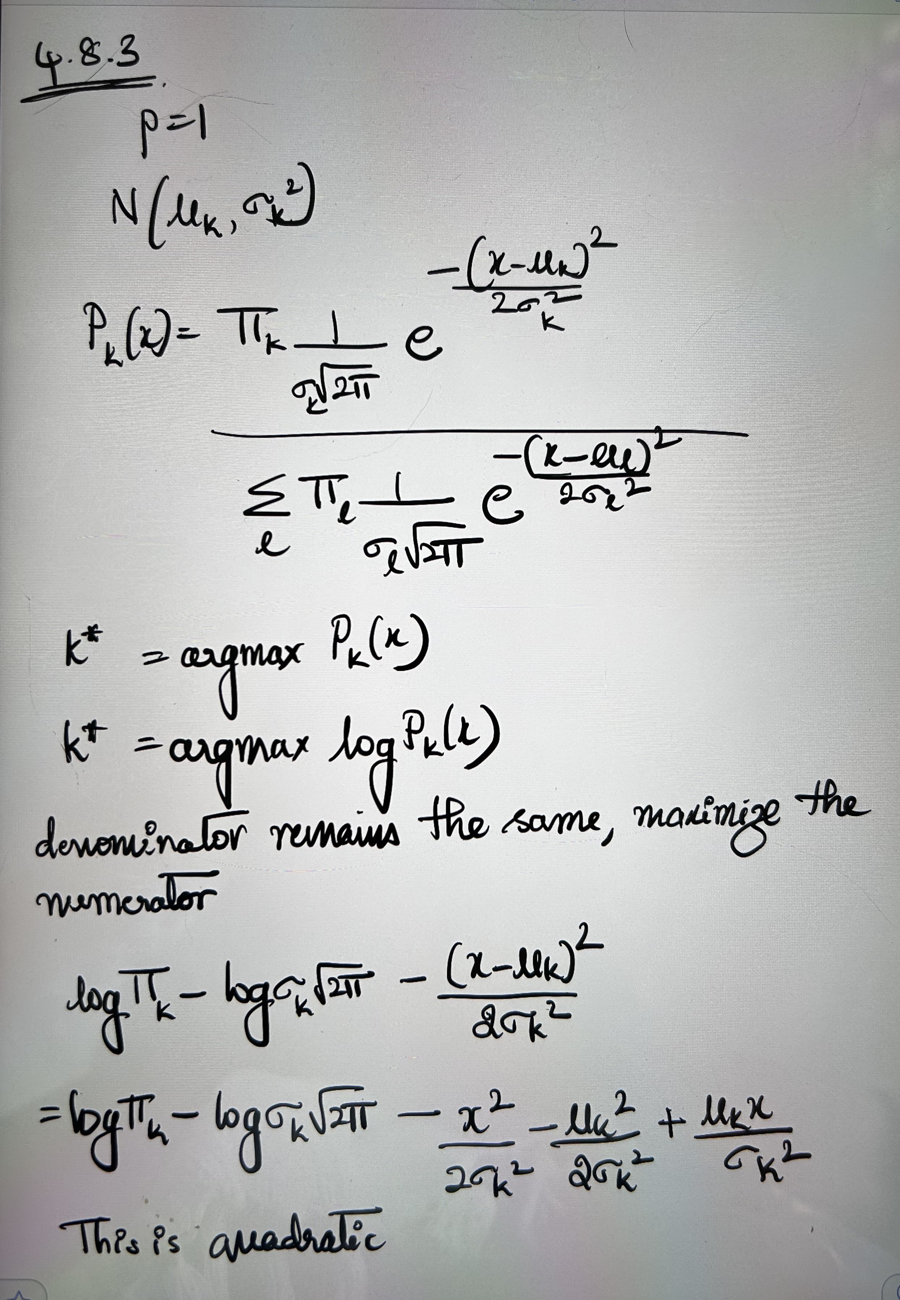

In [7]:
img=Image.open("../data/3.jpeg")
csize=(900,1300)
i_d=img.resize(csize)
display(i_d)


(4)

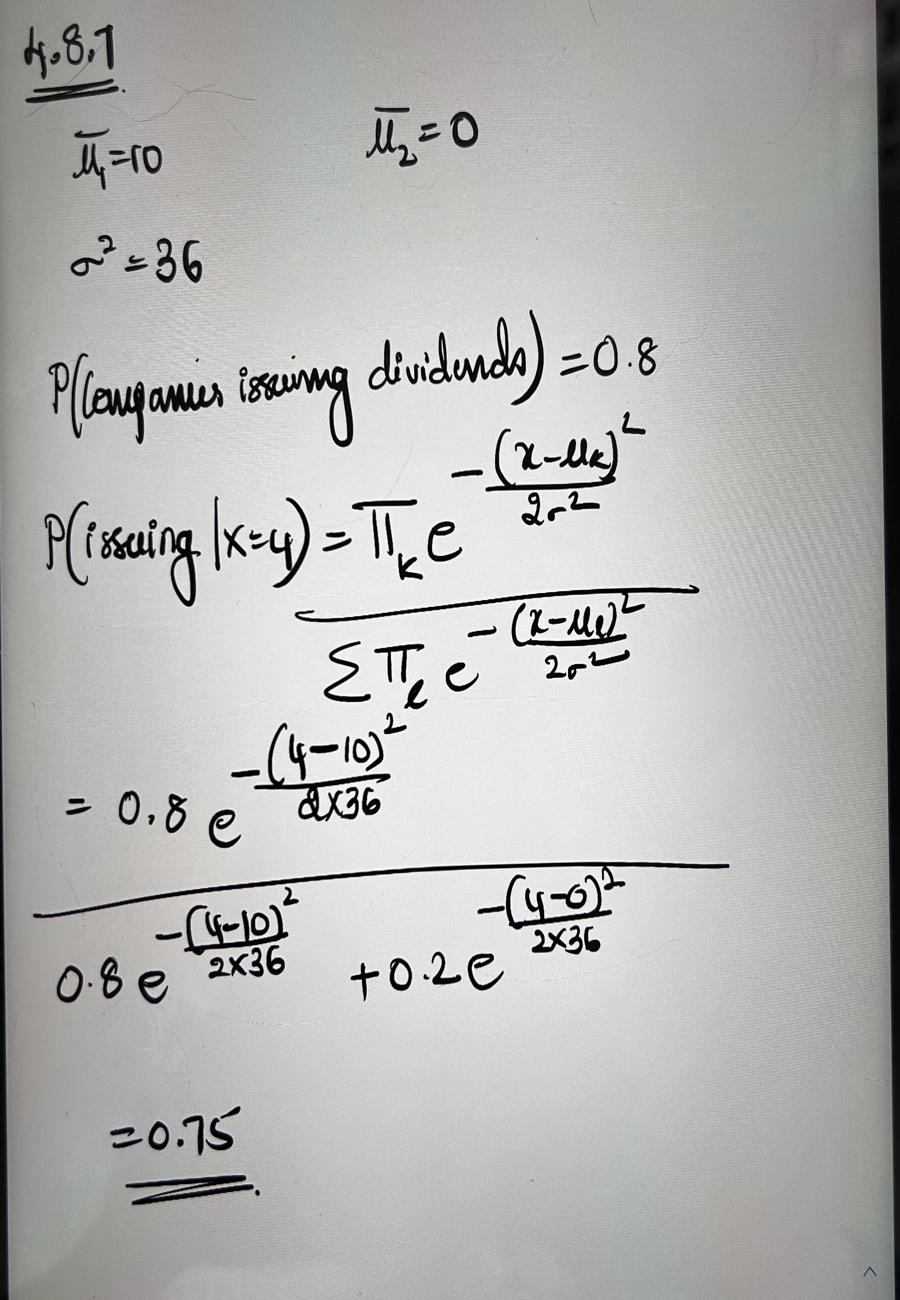

In [8]:
img=Image.open("../data/4.jpeg")
csize=(900,1300)
i_d=img.resize(csize)
display(i_d)